In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataTrain = pd.read_csv("subject/Train_knight.csv")
dataTrain.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.40820,0.47790,0.15550,0.2540,0.09532,Sith
3,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270,Sith
4,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613,Sith


In [3]:
dataTest = pd.read_csv("subject/Test_knight.csv")
dataTest.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
2,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216
3,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.1288,0.2977,0.07259
4,15.34,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,...,18.07,19.08,125.10,980.9,0.1390,0.5954,0.6305,0.2393,0.4667,0.09946


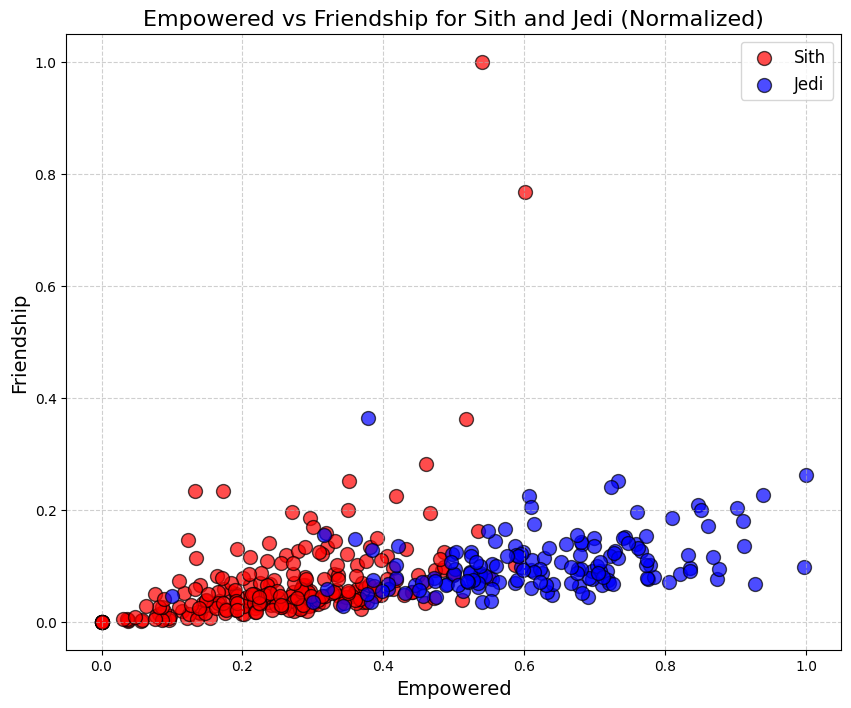

In [4]:
# Normalización de los datos usando MinMaxScaler
scaler = MinMaxScaler()
data = dataTrain[dataTrain.columns[:-1]]
knightTrain = dataTrain['knight']

# Aplicamos la normalización a los datos
data_normalized = scaler.fit_transform(data)
dataTrain_normalized = pd.DataFrame(data_normalized, columns=dataTrain.columns[:-1])
dataTrain_normalized = dataTrain_normalized.join(knightTrain)

# Agrupando los datos por 'knight'
grouped_data = dataTrain_normalized.groupby('knight')

# Creación del gráfico mejorado
fig, ax = plt.subplots(figsize=(10, 8))

# Gráfica para los Sith
ax.scatter(grouped_data.get_group('Sith')['Empowered'], 
           grouped_data.get_group('Sith')['Friendship'], 
           label='Sith', color='red', alpha=0.7, edgecolor='k', s=100)

# Gráfica para los Jedi
ax.scatter(grouped_data.get_group('Jedi')['Empowered'], 
           grouped_data.get_group('Jedi')['Friendship'], 
           label='Jedi', color='blue', alpha=0.7, edgecolor='k', s=100)

# Ajustes de estilo
ax.set_xlabel('Empowered', fontsize=14)
ax.set_ylabel('Friendship', fontsize=14)
ax.set_title('Empowered vs Friendship for Sith and Jedi (Normalized)', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()

**Normalization** (Normalización) es técnicas comunes de preprocesamiento de datos.

###  **Normalization (Normalización)**
La **normalización** ajusta los valores de los datos dentro de un **rango específico**, generalmente entre 0 y 1. La idea es reescalar las características para que estén dentro de un rango más controlado, lo que evita que ciertas características con valores grandes dominen otras con valores pequeños.

Fórmula de la normalización (usando MinMaxScaler):
$$X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$$
Donde:
- $X$ es el valor original.
- $X_{\min}$ es el valor mínimo de la característica.
- $X_{\max}$ es el valor máximo de la característica.

### Ejemplo:
Si tienes una columna de datos donde los valores van de 1000 a 100000, la normalización ajustará esos valores para que estén dentro del rango de 0 a 1, manteniendo las proporciones entre ellos.

**Cuándo usar normalización:**
- Cuando los datos no siguen una distribución normal.
- Cuando utilizas modelos que dependen de distancias (como KNN o algoritmos de clustering) y necesitas controlar el impacto de características con diferentes rangos.
- En situaciones donde quieres que los valores estén dentro de un rango específico.

### Comparación:

| Aspecto          | **Standardization**                          | **Normalization**                        |
|------------------|----------------------------------------------|------------------------------------------|
| **Propósito**     | Centrar los datos en torno a 0, con una desviación estándar de 1. | Escalar los datos dentro de un rango específico (ej. [0,1]). |
| **Fórmula**       | $Z = \frac{X - \mu}{\sigma}$             | $X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$ |
| **Cuándo usar**   | Cuando los datos siguen una distribución normal o la varianza es importante. | Cuando los datos no siguen una distribución normal o hay grandes diferencias de escala entre características. |
| **Modelos típicos** | Regresión lineal, SVM, redes neuronales.    | KNN, redes neuronales, clustering.       |

### Resumen:
- **Standardization** es útil cuando los datos están normalmente distribuidos y quieres que las características tengan la misma importancia, ajustadas a una escala común de media 0 y desviación estándar 1.
- **Normalization** es útil cuando las características tienen diferentes escalas y necesitas comprimir los valores dentro de un rango definido (como [0, 1]), preservando las proporciones relativas.